In [40]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import numpy as np
from scipy import stats
import networkx as nx
import datetime as dt
import random
import pickle
import math
import csv
import os

%matplotlib inline

### Visualizations & plots

In [9]:
home_dir = os.path.expanduser("~")
code_dir = os.path.join(home_dir,"Developer","GitHub","endogenous-growth")
nets_dir = os.path.join(code_dir,"networks")
figs_dir = os.path.join(code_dir,"figures")

In [36]:
from models import InOneOutOne_Strategic
from utils import get_distribution

### Endogenous growth -- opportunity space

In [12]:
# DISTRIBUTIONS
runs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
gammas = [0,1,2,3,4,5,6,7,8,9,"inf"]

m = 3
alpha = 0.95

Vs = {}
for gamma in gammas:
    Vs[gamma] = []
    for run in runs:    
        network = "_".join(["i1o1","m"+str(m),"a"+str(alpha),"g"+str(gamma)])

        # LOAD RUN
        try:
            with open(os.path.join(nets_dir,network,"run_"+str(run)+'.pkl'), 'rb') as f:
                model = pickle.load(f)
        except:
            continue

        model.specs["alpha"] = alpha

        # Get the most recent adjacent possible (pre-100th node)
        V = model.explore()

        # Plot the distribution
        Vs[gamma].append(list(V.values()))

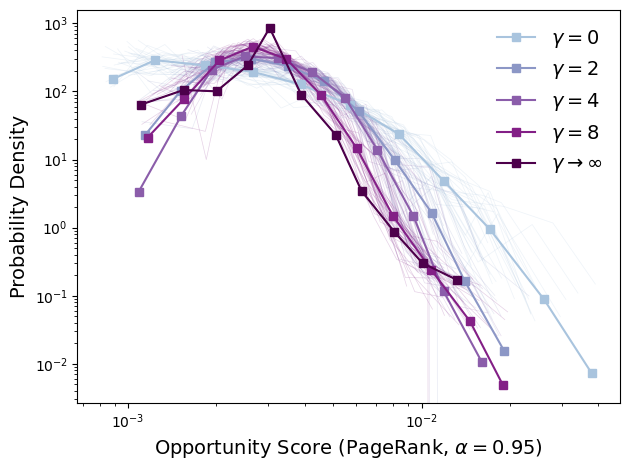

In [33]:
plot_gammas = [0,2,4,8,"inf"]

# Create a colorbar
cmap = plt.colormaps['BuPu'] 
colors = [cmap(i) for i in np.linspace(0.333, 1, len(plot_gammas))]

# Plot the distributions
for i, gamma in enumerate(plot_gammas):
    color = colors[i]
    for V in Vs[gamma]:
        # get PDFs
        x_pdf, y_pdf = get_distribution(V, number_of_bins = 11)
        # plot PDFs
        plot = plt.loglog(x_pdf, y_pdf, color = color, lw = 0.5, alpha = 0.2)

# Plot the overall distributions
for i, gamma in enumerate(plot_gammas):
    color = colors[i]    
    # get combined PDF
    x_pdf, y_pdf = get_distribution([item for sublist in Vs[gamma] for item in sublist], number_of_bins = 11)
    # plot combined PDF
    label = f'$\\gamma = ${gamma}' if gamma != "inf" else f'$\\gamma \\to \\infty$'
    plot = plt.loglog(x_pdf, y_pdf, color = color, marker = "s",
                    lw = 1.5, label=label)

# READY OUTPUT DIRECTORY
output = "_".join(["i1o1","m"+str(m),"a"+str(alpha)])
if not os.path.exists(os.path.join(figs_dir,output)):
    os.mkdir(os.path.join(figs_dir,output))

# labels
plt.xlabel("Opportunity Score (PageRank, "+f'$\\alpha = ${alpha}'+")", fontsize = 14)
plt.ylabel("Probability Density", fontsize = 14);
plt.legend(loc='upper right',frameon=False, fontsize=14)
# save
plt.savefig(os.path.join(figs_dir,output,"pageranks.jpeg"))
plt.savefig(os.path.join(figs_dir,output,"pageranks.pdf"))
plt.tight_layout()
plt.show()

### Path dependence -- examples

In [109]:
# DISTRIBUTIONS
examples = []
examples.append({'gamma':8, 'run':-1, 'n_i':48})
examples.append({'gamma':8, 'run':1, 'n_i':56})
examples.append({'gamma':8, 'run':5, 'n_i':77})
examples.append({'gamma':8, 'run':8, 'n_i':94})
examples.append({'gamma':8, 'run':4, 'n_i':45})
examples.append({'gamma':7, 'run':2, 'n_i':46})

m = 3
alpha = 0.95

around = 5

Vs = {}
Ss = {}
for example in examples:

    network = "_".join(["i1o1","m"+str(m),"a"+str(alpha),"g"+str(example["gamma"])])
    example["label"] = "_".join([network,"r"+str(example["run"])])

    # LOAD RUN
    with open(os.path.join(nets_dir,network,"run_"+str(example['run'])+'.pkl'), 'rb') as f:
        model = pickle.load(f)
        model.specs["alpha"] = alpha

    Vs[example["label"]] = {}
    Ss[example["label"]] = {}
    for term in ["pre","post"]:
        n_i = example["n_i"]
        idxs = list(range(n_i-around,n_i)) if term == "pre" else list(range(n_i,n_i+around))
        Vs[example["label"]][term] = []
        Ss[example["label"]][term] = []
        for idx in idxs:
            # subgraph based off of the absolute vertex index, no? we'll find out soon enough
            nodes = list(model.networks[idx].nodes)
            node = max(nodes)
            G_n_i = model.G.subgraph(range(1,node))
            # now explore the subgraph... it'd be nice to have a version of explore() that takes a subgraph as an argument
            tmp = InOneOutOne_Strategic(m=m,alpha=alpha,gamma=example["gamma"])
            tmp.G = G_n_i
            tmp.nodes = model.networks[n_i-1].nodes-{node}
            V = tmp.explore()
            Vs[example["label"]][term].append(list(V.values()))
            # record also the sampled values
            Ss[example["label"]][term].append(model.score(model.networks[idx])[node])
            del tmp

n_i = 44, node = 1849, score = 0.04542769277864785
n_i = 45, node = 1936, score = 0.031079341060650335
n_i = 46, node = 2025, score = 0.021506849146133128
n_i = 47, node = 2116, score = 0.030122300840475704
n_i = 48, node = 2209, score = 0.012289249506936729
n_i = 49, node = 2304, score = 0.008475428555842414
n_i = 50, node = 2401, score = 0.011410065863382498
n_i = 51, node = 2500, score = 0.017989067210315873
n_i = 52, node = 2601, score = 0.013580686983385246
n_i = 53, node = 2704, score = 0.02195475993926607
n_i = 52, node = 2601, score = 0.03972359143681532
n_i = 53, node = 2704, score = 0.030311328269362937
n_i = 54, node = 2809, score = 0.03164883301128498
n_i = 55, node = 2916, score = 0.03453120767422874
n_i = 56, node = 3025, score = 0.006744358117686495
n_i = 57, node = 3136, score = 0.02688501648021994


In [ ]:
# Grab colors matching the examples
from matplotlib.colors import rgb2hex
color = {}
for term, cmap_name in zip(["pre","post"],["Blues","BuPu"]):
    cmap = plt.colormaps[cmap_name]
    color[term] = rgb2hex([cmap(i) for i in np.linspace(0, 0.8, 10)][-1])

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_59986/4156282604.py:16: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


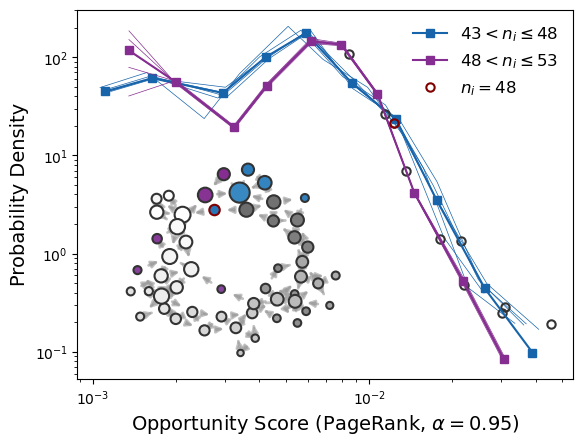

In [ ]:
for example in examples:
    
    n_i = example["n_i"]

    fig, ax = plt.subplots()

    # Plot the overall distributions
    for term in Vs[example['label']]:
        n_min = n_i-around if term == "pre" else n_i
        n_max = n_i if term == "pre" else n_i+around
        # Plot
        for V, S in zip(Vs[example['label']][term],Ss[example['label']][term]):
            x_pdf, y_pdf = get_distribution(V, number_of_bins = 10)
            ax.loglog(x_pdf, y_pdf, color = color[term], lw = 0.5)
            # Interpolate the sampled value on the log scale
            log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))
            ax.plot(S,10**log_y,'o',color='#333333',fillstyle="none", markersize=6, markeredgewidth=1.5)
        if term == "pre":
            S_i = S
            y_i = 10**log_y
        # get combined PDF
        x_pdf, y_pdf = get_distribution([item for sublist in Vs[example['label']][term] for item in sublist], number_of_bins = 10)
        # plot combined PDF
        plot = ax.loglog(x_pdf, y_pdf, color = color[term], marker = "s",
                        lw = 1.5, label=f'${n_min} < n_i \\leq {n_max}$')
    # plot the key sampled value
    ax.plot(S_i,y_i,'o',color='#800000',fillstyle="none", markersize=6, markeredgewidth=1.5, label=f'$n_i = ${n_i}')



    # import the example's network
    with open(os.path.join(figs_dir,output,f"{example['label']}_example.pickle"), 'rb') as f:
        G, pos, pr_rel, colors, borders = pickle.load(f)

    # initialize inset figure
    ax_inset = inset_axes(ax, width="50%", height="60%", loc='lower left',
                      bbox_to_anchor=(0.05, 0.0, 1.0, 1.0), bbox_transform=ax.transAxes)

    # draw network
    nx.draw_networkx_nodes(G, pos, node_size=pr_rel, node_color=colors, linewidths=1.5,
                        edgecolors=borders, ax=ax_inset)
    nx.draw_networkx_edges(G, pos, edge_color='#999999', ax=ax_inset, width=2, alpha=0.6)
    ax_inset.set_axis_off()

    # labels
    ax.set_xlabel("Opportunity Score (PageRank, "+f'$\\alpha={alpha}$'+")", fontsize = 14)
    ax.set_ylabel("Probability Density", fontsize = 14);
    ax.legend(loc="upper right",frameon=False, fontsize=12)
    # save
    plt.savefig(os.path.join(figs_dir,output,f"{example['label']}_example.pdf"))
    plt.savefig(os.path.join(figs_dir,output,f"{example['label']}_example.jpeg"))
    plt.show()